In [40]:
from fastai.tabular import *
import seaborn as sns
from tqdm import tqdm

In [70]:
products = pd.read_csv('./.datasets/z_init_ds/products.csv')
productBlocks = pd.read_csv('./.datasets/z_init_ds/product_blocks.csv')
initialDaysPos = pd.read_csv('./.datasets/z_init_ds/positions_day_0_day_63.csv')
lastDayPos = pd.read_csv('./.datasets/z_init_ds/positions_day_71.csv')
initDaysSs = pd.read_csv('./.datasets/z_init_ds/stock_and_sales_day_0_day_63.csv')
lastDaySs = pd.read_csv('./.datasets/z_init_ds/stock_day_71_stock_replenishment_days_72-77.csv')


In [89]:
prodsFullInfo = products.set_index('product_id').join(productBlocks.set_index('product_id'))
prodsFullInfo[213413]

KeyError: 213413

In [75]:
prodsFullInfoByBlock = prodsFullInfo.sort_values(by=['block_id'])

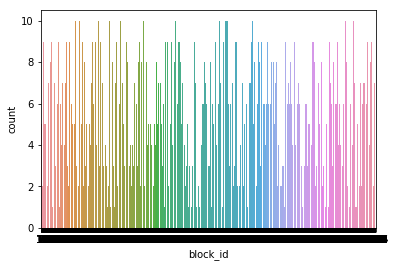

In [80]:
# sns.pairplot(prodsFullInfoByBlock)
sns.countplot(prodsFullInfoByBlock['block_id'])

In [59]:
initialDaysPos.loc[initialDaysPos['product_id'] == 213413]

,date_number,product_id,category_id,position
47218,4,213413,76153878,247
52434,4,213413,574193914,254
53124,4,213413,627301934,247
57376,4,213413,931365814,13
59388,5,213413,76153878,247
64635,5,213413,574193914,255
65330,5,213413,627301934,247
69602,5,213413,931365814,13
71601,6,213413,76153878,37
76659,6,213413,574193914,19


In [45]:
lastDayPos.tail()

,date_number,product_id,category_id,position
20024,71,494340817,997362045,6
20025,71,546871331,997362045,5
20026,71,648347795,997362045,13
20027,71,706861109,997362045,10
20028,71,715387790,997362045,7


In [5]:
initialDaysPos.shape, initialDaysPos.columns

((969897, 4),
 Index(['date_number', 'product_id', 'category_id', 'position'], dtype='object'))

In [6]:
lastDayPos.shape, lastDayPos.columns

((20029, 4),
 Index(['date_number', 'product_id', 'category_id', 'position'], dtype='object'))

In [62]:
initDaysSs.loc[initDaysSs['product_id'] == 213413]

,date_number,product_id,color_id,size_id,sales,stock
85638,3,213413,271590995,3000471,0,60
85639,3,213413,271590995,319419383,1,18
85640,3,213413,271590995,422108434,0,15
85641,3,213413,271590995,558685710,0,25
85642,3,213413,271590995,600575761,2,63
85643,3,213413,271590995,674701524,0,48
85644,3,213413,271590995,941322277,0,70
115015,4,213413,271590995,3000471,1,57
115016,4,213413,271590995,319419383,0,17
115017,4,213413,271590995,422108434,1,15


In [8]:
lastDaySs.shape, lastDaySs.columns

((51268, 10), Index(['product_id', 'color_id', 'size_id', 'stock_at_day_71',
        'stock_replenishment_days_72', 'stock_replenishment_days_73',
        'stock_replenishment_days_74', 'stock_replenishment_days_75',
        'stock_replenishment_days_76', 'stock_replenishment_days_77'],
       dtype='object'))

In [60]:
lastDaySs.loc[initialDaysPos['product_id'] == 213413]

,product_id,color_id,size_id,stock_at_day_71,stock_replenishment_days_72,stock_replenishment_days_73,stock_replenishment_days_74,stock_replenishment_days_75,stock_replenishment_days_76,stock_replenishment_days_77
47218,922535702,744479403,111455099,15,1,0,0,0,0,0


In [49]:
print(products.head())
print(productBlocks.head())
print(initialDaysPos.head())
print(lastDayPos.head())
print(initDaysSs.head())
print(lastDaySs.head())
# print(products.describe())


   product_id  family_id  subfamily_id  price
0      151926  396066037     335531561  25.95
1      213413  552529755      11509337  19.95
2      310130  679611953     533441312  12.95
3      373883  775013441      62518413  17.95
4      455200  998145072     490222156  29.95
   product_id  block_id
0   612967398         0
1   296892108         0
2   139541214         0
3   963923934         0
4   938230141         0
   date_number  product_id  category_id  position
0            0     4450020      4461548        17
1            0    42147334      4461548         4
2            0    81131830      4461548        35
3            0    84035833      4461548        38
4            0   125252584      4461548        39
   date_number  product_id  category_id  position
0           71    65968023      2312968         6
1           71    70320877      2312968        24
2           71    70700940      2312968        22
3           71    76636979      2312968         1
4           71    83181798    

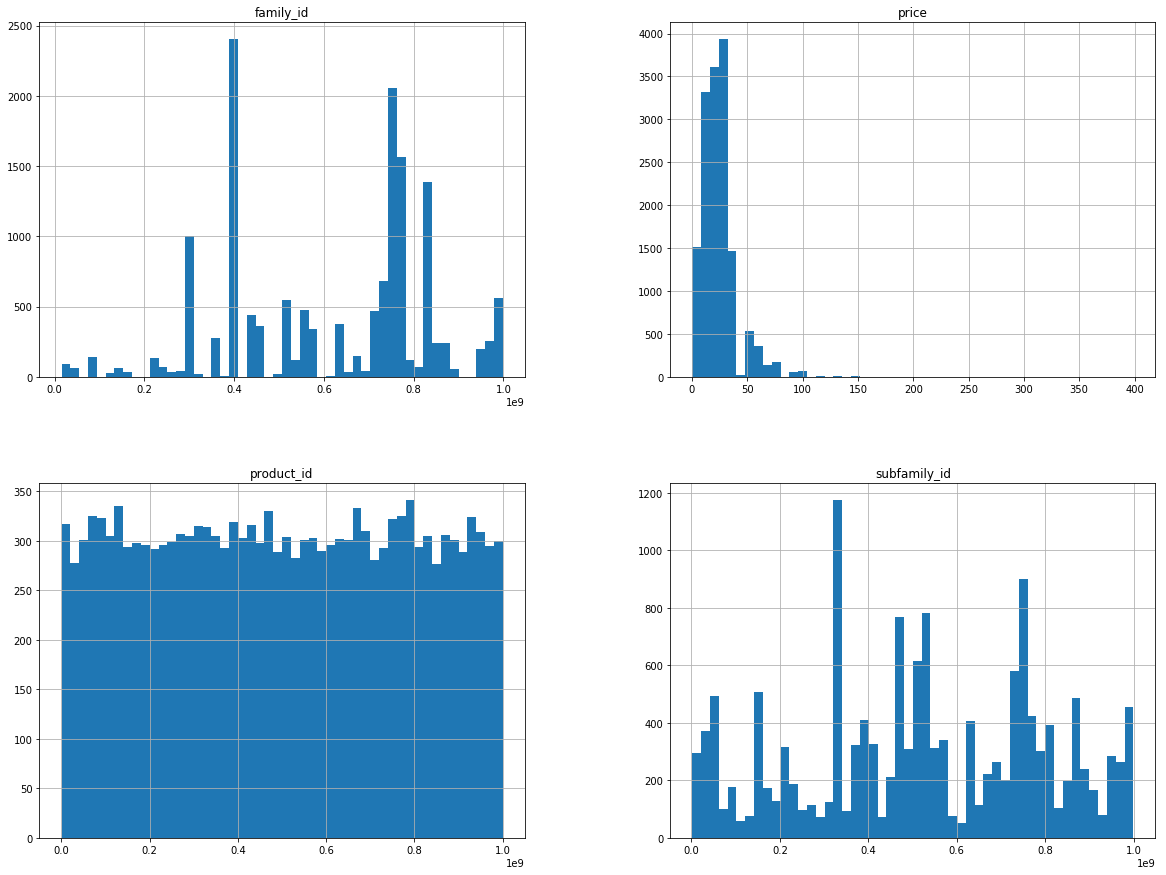

In [17]:
products.hist(bins=50, figsize=(20,15))
plt.show()

In [38]:
prodsFullInfo = products.set_index('product_id').join(productBlocks.set_index('product_id'))
prodsFullInfo.head()

,family_id,subfamily_id,price,block_id
product_id,,,,
151926,396066037,335531561,25.95,1969
213413,552529755,11509337,19.95,1648
310130,679611953,533441312,12.95,1726
373883,775013441,62518413,17.95,150
455200,998145072,490222156,29.95,1400
